In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('Credit.xlsx',header=None)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
0     690 non-null object
1     690 non-null object
2     690 non-null float64
3     690 non-null object
4     690 non-null object
5     690 non-null object
6     690 non-null object
7     690 non-null float64
8     690 non-null object
9     690 non-null object
10    690 non-null int64
11    690 non-null object
12    690 non-null object
13    690 non-null object
14    690 non-null int64
15    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB


In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [5]:
df.columns=['Gender','Age','Debt','Married','BankCustomer','EducationLevel','Ethenicity','YearsEmployed','PriorDefault','Employed',
           'CreditScore','DriversLicense','Citizen','ZipCode','Income','Approved']

In [6]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethenicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [7]:
df['Gender'].value_counts()

b    468
a    210
?     12
Name: Gender, dtype: int64

In [8]:
df['Age']=df['Age'].replace('?',np.NaN)
df['Gender']=df['Gender'].replace('?',np.NaN)
df['Married']=df['Married'].replace('?',np.NaN)
df['BankCustomer']=df['BankCustomer'].replace('?',np.NaN)
df['EducationLevel']=df['EducationLevel'].replace('?',np.NaN)
df['Ethenicity']=df['Ethenicity'].replace('?',np.NaN)
df['ZipCode']=df['ZipCode'].replace('?',np.NaN)

In [9]:
df.isnull().sum()

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethenicity         9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
Approved           0
dtype: int64

In [10]:
df.dtypes

Gender             object
Age               float64
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethenicity         object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode           float64
Income              int64
Approved           object
dtype: object

In [11]:
df['Gender'].fillna(df['Gender'].value_counts().index[0], inplace=True)
df['Married'].fillna(df['Married'].value_counts().index[0],inplace=True)
df['BankCustomer'].fillna(df['BankCustomer'].value_counts().index[0],inplace=True)
df['EducationLevel'].fillna(df['EducationLevel'].value_counts().index[0],inplace=True)
df['Ethenicity'].fillna(df['Ethenicity'].value_counts().index[0],inplace=True)

In [12]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['ZipCode'].fillna(df['ZipCode'].median(),inplace=True)

In [13]:
df.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethenicity        0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1e7286822e8>,
 'caps': [<matplotlib.lines.Line2D at 0x1e728682c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e728682160>],
 'medians': [<matplotlib.lines.Line2D at 0x1e7286974e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e728697940>],
 'means': []}

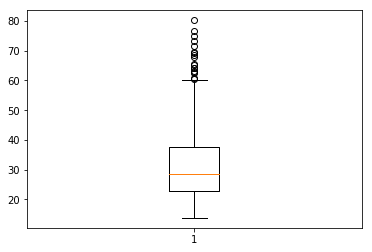

In [14]:
plt.boxplot(df['Age'])

In [15]:
#Detect and delete outliers
numeric_names=['Age','Debt','YearsEmployed','CreditScore','ZipCode','Income']
for i in numeric_names:
    print(i)
    q75,q25=np.percentile(df.loc[:,i],[75,25])
    iqr=q75-q25
    min=q25-(iqr*1.5)
    max=q75+(iqr*1.5)
    print(min)
    print(max)
    df=df.drop(df[df.loc[:,i]<min].index)
    df=df.drop(df[df.loc[:,i]>max].index)

Age
0.11375000000001023
60.26374999999999
Debt
-8.0
16.0
YearsEmployed
-3.3375
6.0024999999999995
CreditScore
-3.0
5.0
ZipCode
-170.0
550.0
Income
-300.0
500.0


In [16]:
df.shape

(424, 16)

In [17]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
df.iloc[:, 0] = labelencoder_X.fit_transform(df.iloc[:, 0])
df.iloc[:, 3] = labelencoder_X.fit_transform(df.iloc[:, 3])
df.iloc[:, 4] = labelencoder_X.fit_transform(df.iloc[:, 4])
df.iloc[:, 5] = labelencoder_X.fit_transform(df.iloc[:, 5])
df.iloc[:, 6] = labelencoder_X.fit_transform(df.iloc[:, 6])
df.iloc[:, 8] = labelencoder_X.fit_transform(df.iloc[:, 8])
df.iloc[:, 9] = labelencoder_X.fit_transform(df.iloc[:, 9])
df.iloc[:, 11] = labelencoder_X.fit_transform(df.iloc[:, 11])
df.iloc[:, 12] = labelencoder_X.fit_transform(df.iloc[:, 12])
df.iloc[:, 15] = labelencoder_X.fit_transform(df.iloc[:, 15])

In [18]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethenicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,0,0,12,7,1.25,1,1,1,0,0,202.0,0,0
3,1,27.83,1.540,0,0,12,7,3.75,1,1,5,1,0,100.0,3,0
4,1,20.17,5.625,0,0,12,7,1.71,1,0,0,0,2,120.0,0,0
5,1,32.08,4.000,0,0,9,7,2.50,1,0,0,1,0,360.0,0,0
8,1,54.42,0.500,1,1,8,3,3.96,1,0,0,0,0,180.0,314,0


In [19]:
df.dtypes

Gender              int64
Age               float64
Debt              float64
Married             int64
BankCustomer        int64
EducationLevel      int64
Ethenicity          int64
YearsEmployed     float64
PriorDefault        int64
Employed            int64
CreditScore         int64
DriversLicense      int64
Citizen             int64
ZipCode           float64
Income              int64
Approved            int64
dtype: object

In [20]:
cnames=['Age','Debt','YearsEmployed','CreditScore','ZipCode','Income']
df_corr=df.loc[:,cnames]

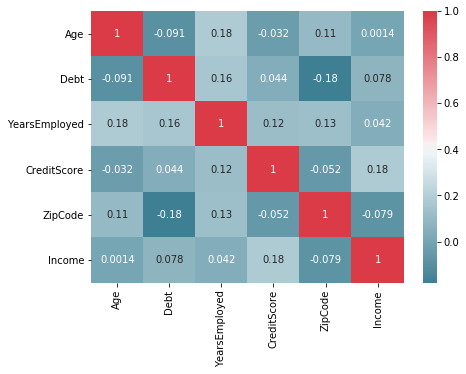

In [38]:
f,ax = plt.subplots(figsize=(7,5))
corr=df_corr.corr()
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),annot=True)
#BankCustomer and Married have high corr, so we drop them

In [22]:
cat_names=['Gender','Married','BankCustomer','EducationLevel','Ethenicity','PriorDefault','Employed','DriversLicense','Citizen']
from scipy.stats import chi2_contingency

In [23]:
#Chi Square test for categorical dependency
for i in cat_names:
    print(i)
    chi2,p,dof,ex = chi2_contingency(pd.crosstab(df['Approved'],df[i]))
    print(p)
#So here p values of Gender,DriversLicense and Citizen are >0.05 so we reject null hypo, and drop them

Gender
0.936181321491946
Married
0.007347571403043043
BankCustomer
0.007347571403043043
EducationLevel
1.4856530552421313e-05
Ethenicity
0.0018862879778655443
PriorDefault
4.5616777473741236e-39
Employed
9.318392936933692e-07
DriversLicense
0.418524288441283
Citizen
0.3827270388479076


In [24]:
df.drop(['Gender','DriversLicense','Citizen'],axis=1,inplace=True)

In [25]:
df.shape

(424, 13)

In [26]:
#So not a normal distribution, we use Normalization
for i in cnames:
    print(i)
    df[i] = pd.Float64Index(df[i])

Age
Debt
YearsEmployed
CreditScore
ZipCode
Income


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E72994B0B8>,
      dtype=object)

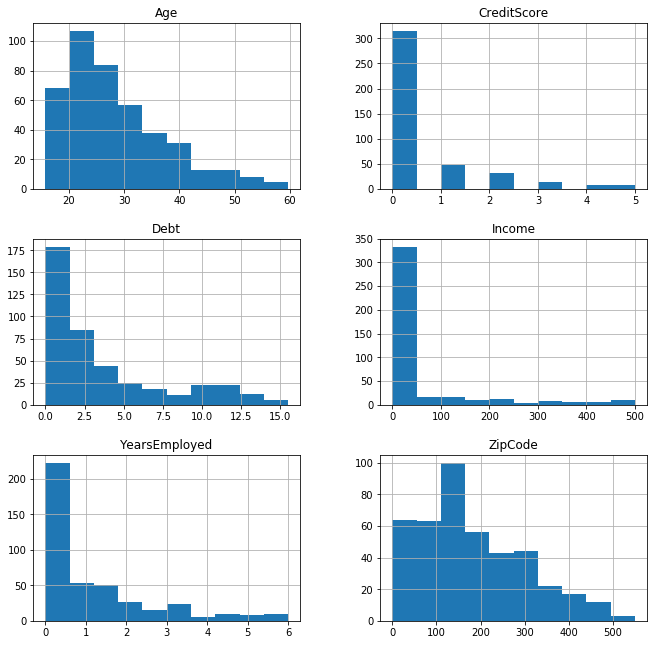

In [27]:
df[df.dtypes[(df.dtypes=="float64")]
                        .index.values].hist(figsize=[11,11])

In [28]:
#Standardization
for i in cnames:
    print(i)
    df[i]=(df[i] - df[i].mean())/df[i].std()

Age
Debt
YearsEmployed
CreditScore
ZipCode
Income


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E729DA2FD0>,
      dtype=object)

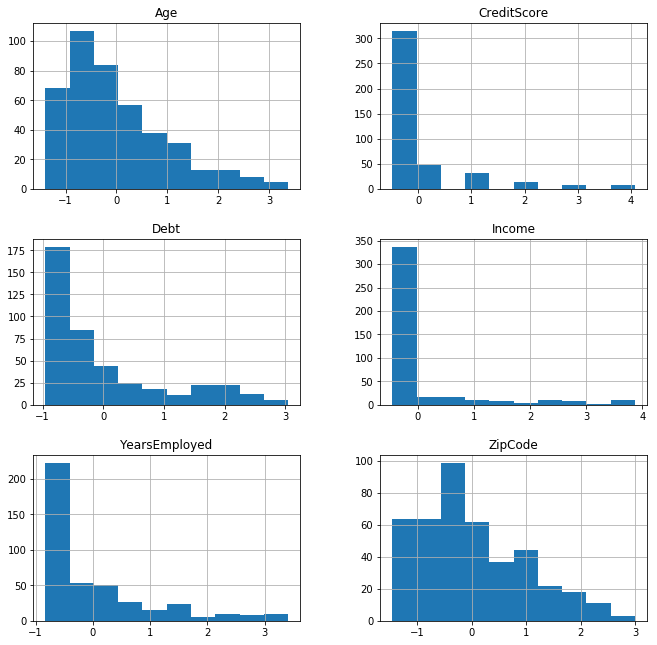

In [29]:
df[df.dtypes[(df.dtypes=="float64")]
                        .index.values].hist(figsize=[11,11])

In [30]:
df.head()

,Age,Debt,Married,BankCustomer,EducationLevel,Ethenicity,YearsEmployed,PriorDefault,Employed,CreditScore,ZipCode,Income,Approved
0,0.241623,-0.953794,0,0,12,7,0.054364,1,1,0.427604,0.181615,-0.455437,0
3,-0.083668,-0.556594,0,0,12,7,1.818518,1,1,4.071911,-0.644650,-0.429492,0
4,-0.914243,0.497017,0,0,12,7,0.378968,1,0,-0.483472,-0.482637,-0.455437,0
5,0.377160,0.077894,0,0,9,7,0.936441,1,0,-0.483472,1.461515,-0.455437,0
8,2.799490,-0.824833,1,1,8,3,1.966706,1,0,-0.483472,0.003401,2.260092,0


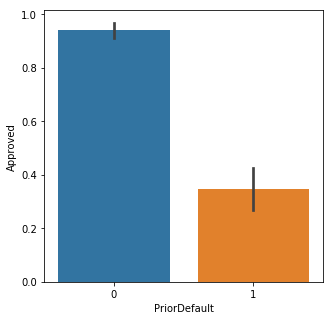

In [31]:
df['PriorDefault']=pd.to_numeric(df['PriorDefault'])
df['Approved']=pd.to_numeric(df['Approved'])
fig, ax = plt.subplots()

fig.set_size_inches(5, 5)

ax = sns.barplot(x="PriorDefault", y="Approved", data=df)

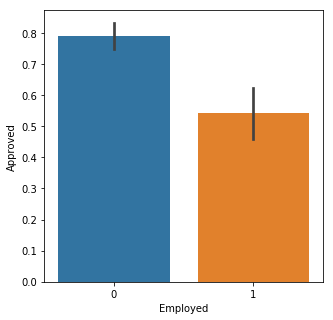

In [32]:
df['Employed']=pd.to_numeric(df['Employed'])
fig, ax = plt.subplots()

fig.set_size_inches(5, 5)

ax = sns.barplot(x="Employed", y="Approved", data=df)

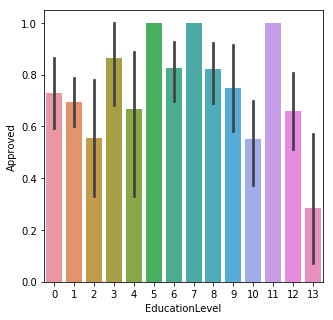

In [33]:
df['EducationLevel']=pd.to_numeric(df['EducationLevel'])
fig, ax = plt.subplots()

fig.set_size_inches(5, 5)

ax = sns.barplot(x="EducationLevel", y="Approved", data=df)

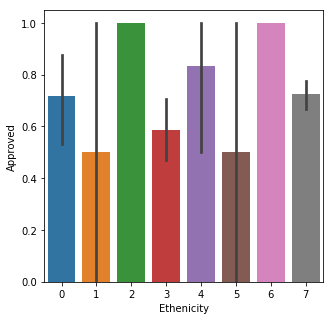

In [34]:
df['Ethenicity']=pd.to_numeric(df['Ethenicity'])
fig, ax = plt.subplots()

fig.set_size_inches(5, 5)

ax = sns.barplot(x="Ethenicity", y="Approved", data=df)

<Figure size 432x288 with 0 Axes>

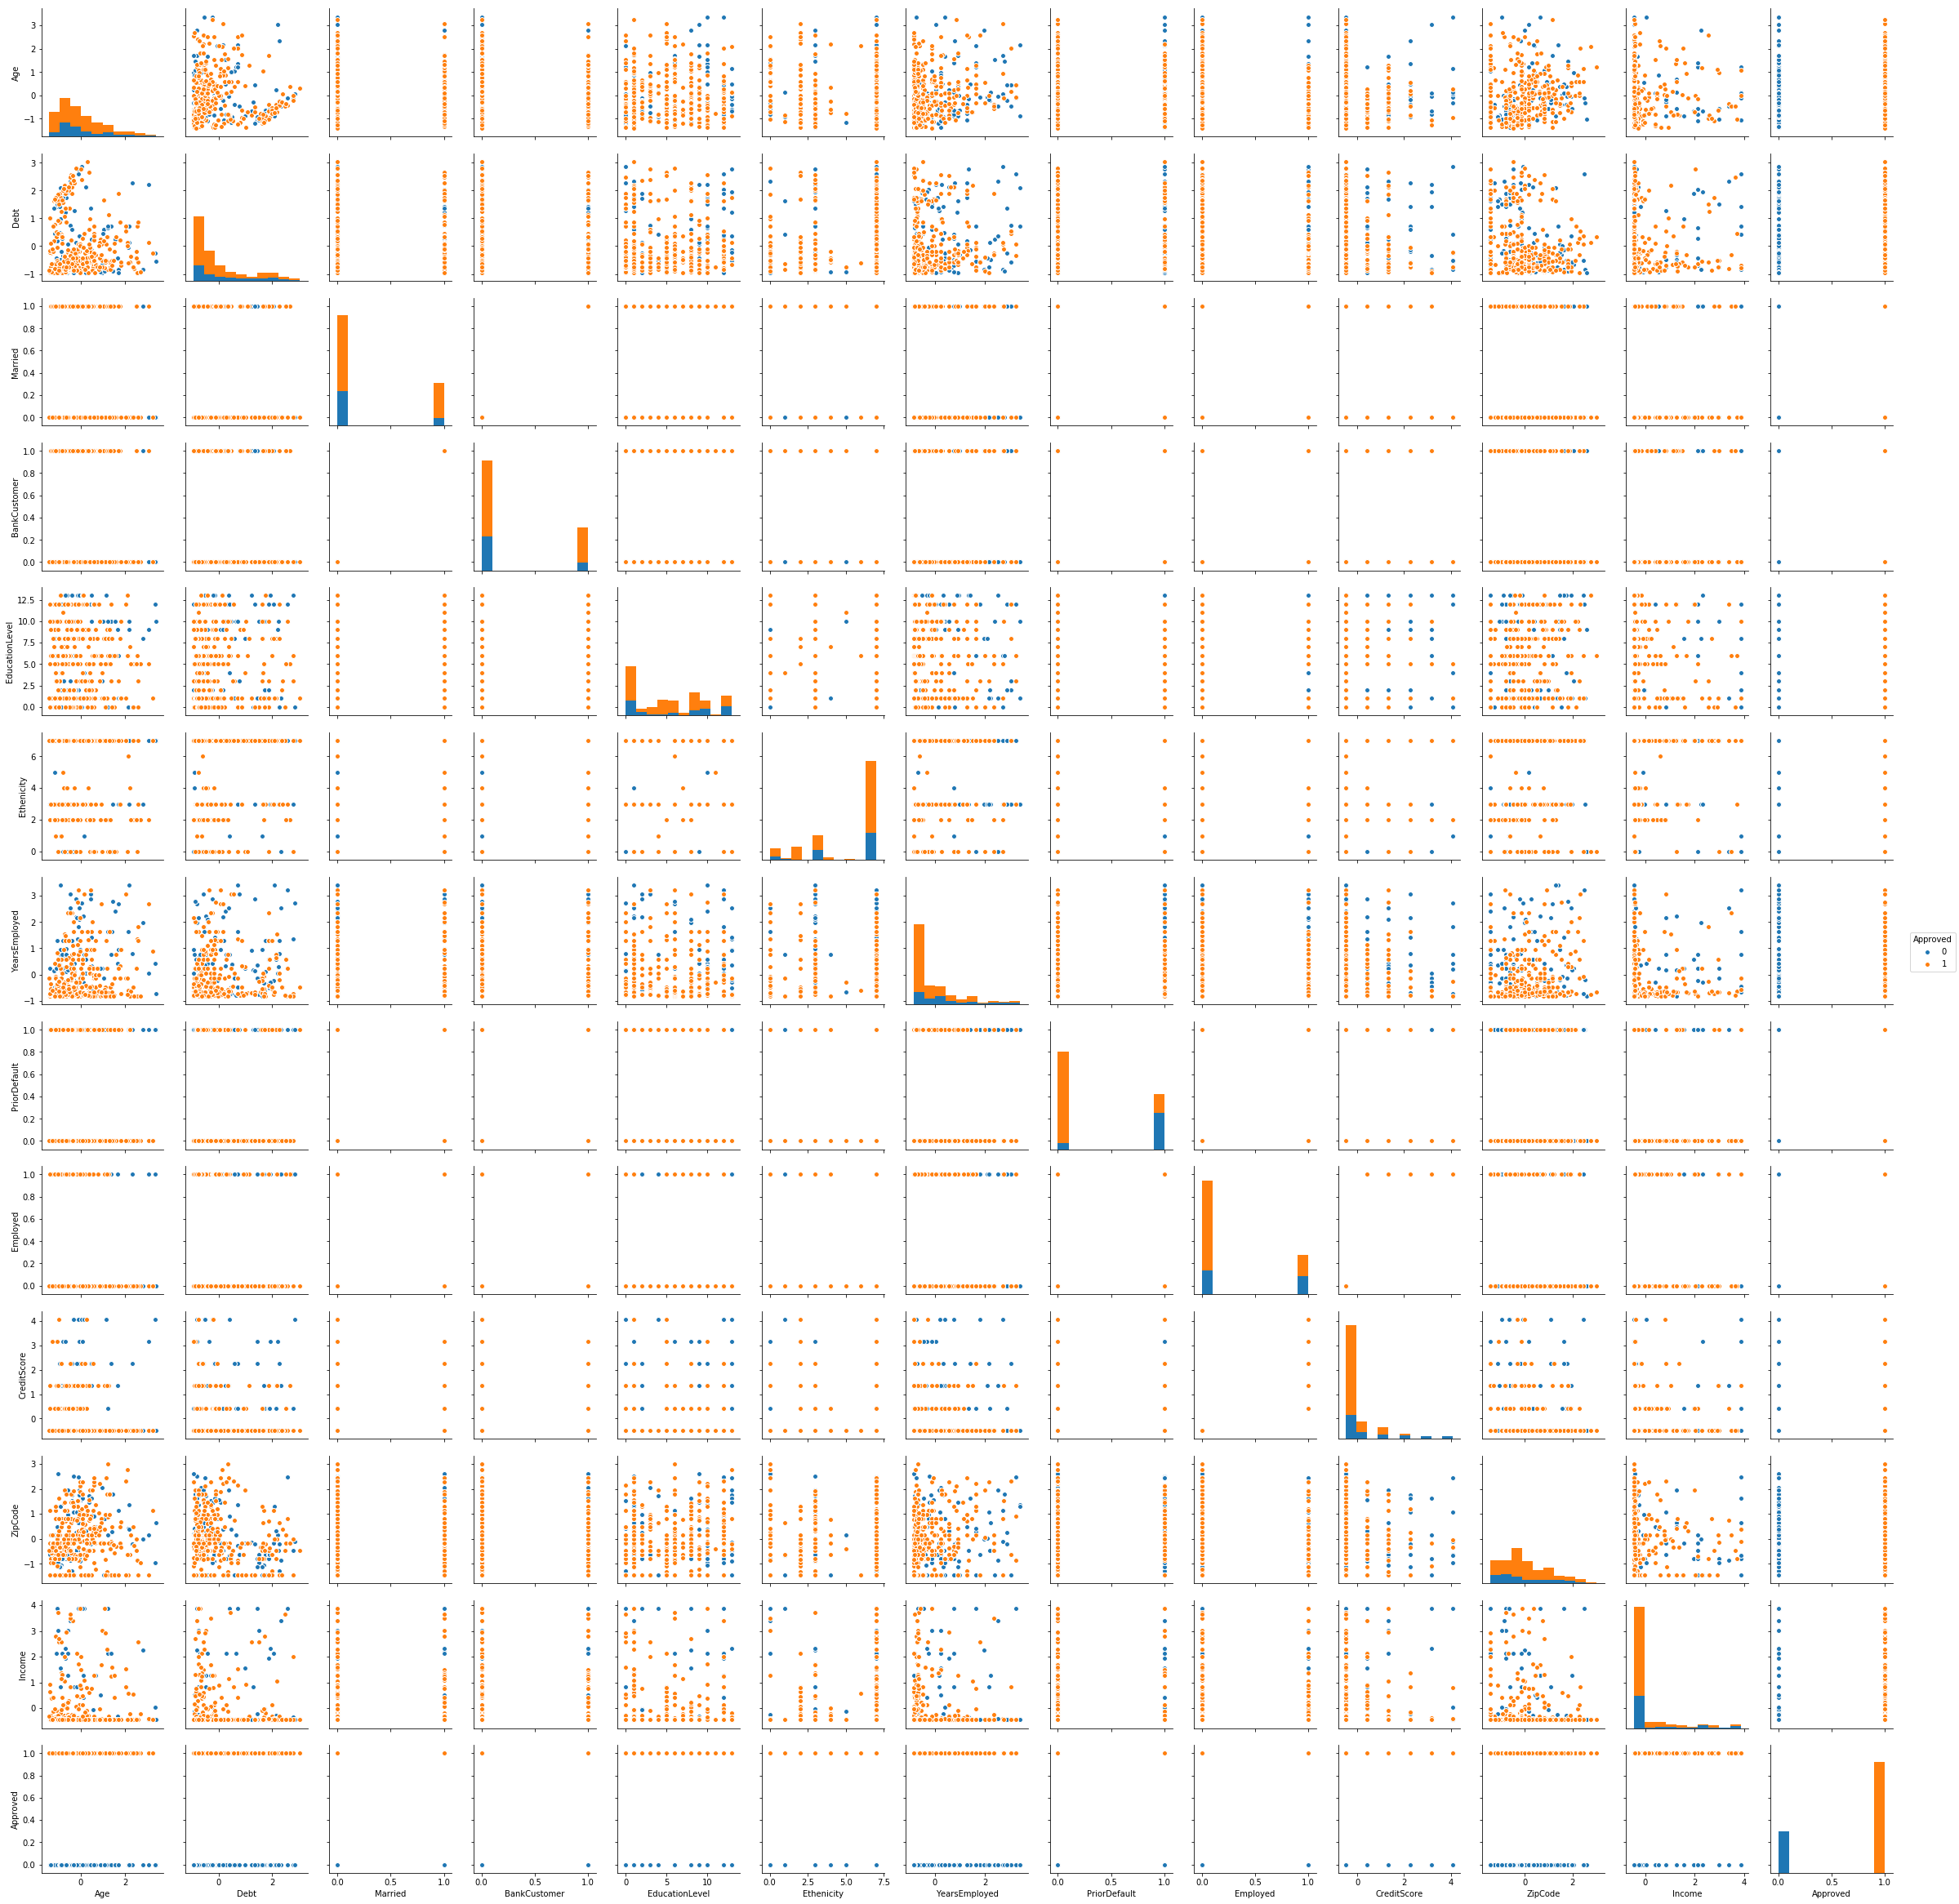

In [37]:
plt.figure()
sns.pairplot(df,hue='Approved')
plt.savefig("1_seaborn_pair_plot.png")

In [419]:
#sns.violinplot(x="EducationLevel", y="Approved", data=df,split=True,palette='Set1')

In [30]:
df.head()

,Age,Debt,Married,BankCustomer,EducationLevel,Ethenicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,Approved
0,0.256842,0.000000,1,0,12,7,0.043860,1,1,1,0,0,0
1,0.675489,0.159286,1,0,10,3,0.106667,1,1,6,0,560,0
2,0.161654,0.017857,1,0,10,3,0.052632,1,0,0,0,824,0
3,0.211729,0.055000,1,0,12,7,0.131579,1,1,5,0,3,0
4,0.096541,0.200893,1,0,12,7,0.060000,1,0,0,2,0,0


In [420]:
from sklearn.linear_model import LogisticRegression         
from sklearn.model_selection import train_test_split            
from sklearn.metrics import accuracy_score                          
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.neighbors import KNeighborsClassifier                   
from sklearn import svm                                              
from sklearn.tree import DecisionTreeClassifier   

In [421]:
X = df.iloc[:, :-1] 
y = df.Approved

In [422]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [423]:
model_log = LogisticRegression()
model_log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [424]:
pred_train = model_log.predict(X_train)
pred_test = model_log.predict(X_test)

In [425]:
print("The accuracy for train data is {}".format(accuracy_score(y_train,pred_train)))
print("The accuracy for test data is {}".format(accuracy_score(y_test,pred_test)))

The accuracy for train data is 0.8648648648648649
The accuracy for test data is 0.8046875


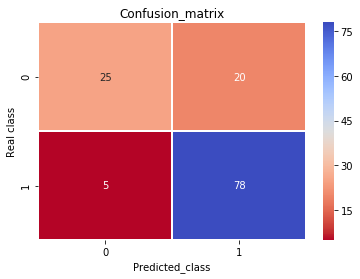

In [426]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred_test)
sns.heatmap(cm,cmap="coolwarm_r",annot=True,linewidths=0.5)
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.show()

In [427]:
print(classification_report(y_test, pred_test)) 

             precision    recall  f1-score   support

          0       0.83      0.56      0.67        45
          1       0.80      0.94      0.86        83

avg / total       0.81      0.80      0.79       128



In [428]:
model_svm = svm.SVC() 
model_svm.fit(X_train,y_train) 
pred_train = model_svm.predict(X_train)
pred_test = model_svm.predict(X_test)
print("The accuracy for train data is {}".format(accuracy_score(y_train,pred_train)))
print("the accuracy for test data is {}".format(accuracy_score(y_test,pred_test)))

The accuracy for train data is 0.8851351351351351
the accuracy for test data is 0.7109375


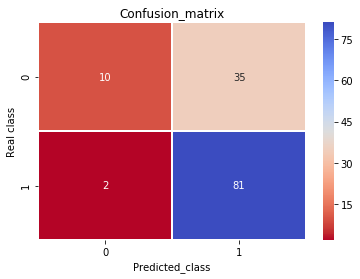

In [429]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred_test)
sns.heatmap(cm,cmap="coolwarm_r",annot=True,linewidths=0.5)
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.show()

In [430]:
print(classification_report(y_test, pred_test)) 

             precision    recall  f1-score   support

          0       0.83      0.22      0.35        45
          1       0.70      0.98      0.81        83

avg / total       0.75      0.71      0.65       128



In [431]:
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
pred_train = model_dt.predict(X_train)
pred_test = model_dt.predict(X_test)
print("The accuracy for train data is {}".format(accuracy_score(y_train,pred_train)))
print("The accuracy for test data is {}".format(accuracy_score(y_test,pred_test)))

The accuracy for train data is 1.0
The accuracy for test data is 0.734375


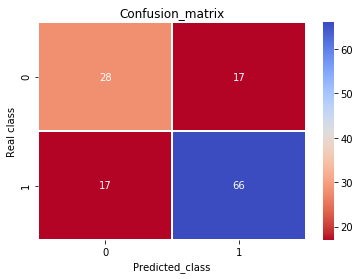

In [432]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred_test)
sns.heatmap(cm,cmap="coolwarm_r",annot=True,linewidths=0.5)
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.show()

In [433]:
print(classification_report(y_test, pred_test)) 

             precision    recall  f1-score   support

          0       0.62      0.62      0.62        45
          1       0.80      0.80      0.80        83

avg / total       0.73      0.73      0.73       128

